In [57]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15
import warnings 
warnings.filterwarnings(action='ignore')
import pandas_profiling

In [58]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [59]:
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# 데이터 받아오기

In [60]:
df_original = pd.read_csv('금융보안원_경진대회_데이터(최종제출).csv')

In [61]:
print(df_original.shape)
df_original.head(5)

(519297, 13)


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [62]:
df = df_original

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


In [64]:
seoul = df['고객소재지_광역시도'] == '서울특별시'

In [65]:
Seoul = df.loc[seoul]

# 파생 변수

In [66]:
Seoul['고객소재지_광역시도'].value_counts()

서울특별시    306122
Name: 고객소재지_광역시도, dtype: int64

In [67]:
len(Seoul) # Check

306122

연령 

In [68]:
Seoul['연령'] = Seoul['연령'].astype('str')

Seoul['연령'] = Seoul['연령'].str[:2]


Seoul['연령'] = Seoul['연령'].astype('int')

Seoul.head(5)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


# xyz세대 나누어주기

In [69]:
# XYZ 세대 나누어 주기

def get_mz(age):
    cat = ''
    if age >= 50: cat = 'X' # 50이상을 X 세대로
    elif age < 50 and age >= 30 : cat = 'Y' # 3,40 대는 Y 세대
    else : cat = 'Z' # 10,20 대는 Z 세대
        
    return cat



In [70]:
# lambda 식에 위에서 생성한 get_mz( ) 함수를 반환값으로 지정. 
# get_mz(X)는 입력값으로 '연령' 컬럼값을 받아서 해당하는 cat 반환

Seoul['XYZ'] = Seoul['연령'].apply(lambda x : get_mz(x))

In [71]:
Seoul['XYZ'].value_counts()

Y    184010
Z     61227
X     60885
Name: XYZ, dtype: int64

# 코로나 전후

In [72]:
Seoul['Covid'] = Seoul['기준년월'].astype('str')
Seoul['Covid'] = Seoul['Covid'].str[:4]

In [73]:
# 코로나 전후

# XYZ 세대 나누어 주기

def get_covid(year):
    cat = ''
    if year == '2019': cat = 'b_cov' 
    else : cat = 'a_cov' 
        
    return cat

In [74]:
Seoul['Covid'] = Seoul['Covid'].apply(lambda x : get_covid(x))

In [75]:
Seoul['Covid'].value_counts()

a_cov    201480
b_cov    104642
Name: Covid, dtype: int64

### 가설검정 코로나 전과 후 품목중분류

- 귀무가설: 코로나 와 품목중분류명 간에는 상관성이 없다. 
- 대립가설 : 코로나 와 품목중분류명 간에는 상관성이 있다.
    
    - p_value 가 0.05 보다 작으므로 귀무가설 기각후 대립가설 채택

- **결론** : 코로나 와 품목중분류명 간에는 상관성이 있다!

In [76]:
result = pd.crosstab(Seoul.Covid , df.품목중분류명)
stats.chi2_contingency(observed = result)

(2032.4777815632297,
 0.0,
 49,
 array([[ 1245.91385134,  8571.99260426, 16069.85345712,  8360.72036639,
          2336.49982687,  4803.97527783,  8079.6822182 ,   161.90956547,
          1150.47935137,  4231.36827801,   654.21995152,   209.29773097,
           766.10867563,  3968.75886085,   955.00316867,  8093.50376647,
          2091.66097177,  2734.69205088,  4786.20471577,  3601.5005782 ,
           210.6140689 ,  4787.5210537 ,  3038.76611286,  2386.52066823,
          1076.76442725,  9434.85211778,   643.68924808,  1744.80592705,
          5364.73523628,  4043.79012289,  5387.1129811 ,  2261.46856482,
          4640.74937443,  9225.55438681,  2391.12785099,  5648.40606033,
          2300.95870274,  4697.35190545,  7448.49818046,  5780.03985339,
          7554.46338388,  2360.19390962,  3845.02309537,  2296.35151998,
          9015.59848688,  4248.4806711 ,   437.02419297,  1316.33793063,
          4220.1794056 ,   799.67529286],
        [  647.08614866,  4452.00739574,  8346.146

### 가설검정 XYZ 와 품목중분류

- 귀무가설: XYZ 와 품목중분류명 간에는 상관성이 없다. 
- 대립가설 : XYZ 와 품목중분류명 간에는 상관성이 있다.
    - p_value 가 0.05 보다 작으므로 귀무가설 기각후 대립가설 채택

- **결론** : XYZ 와 품목중분류명 간에는 상관성이 있다!

In [77]:
result = pd.crosstab(Seoul.XYZ , df.품목중분류명)

품목중분류명,DIY자재/용품,e머니/상품권,o2o서비스,가공식품,가방,가전,건강식품,기부/후원,기타,기타결제,...,음료,인테리어소품,임산부용품서비스,자동차,취미/특기,침구/수예,침대,테이블가구,패션소품,향수
XYZ,,,,,,,,,,,,,,,,,,,,,
X,246,2055,5135,3173,567,1700,3274,6,199,1415,...,2813,463,1086,546,2783,1440,73,244,1285,56
Y,1363,7590,13634,7364,2121,4470,7196,212,1404,3660,...,6821,2385,3629,2421,7460,3930,459,1408,3801,744
Z,284,3379,5647,2166,862,1129,1806,28,145,1354,...,1844,738,1127,522,3455,1085,132,348,1326,415


In [78]:
result = pd.crosstab(Seoul.XYZ , df.품목중분류명)
stats.chi2_contingency(observed = result)

(8922.191396550026,
 0.0,
 98,
 array([[  376.5012152 ,  2590.36018319,  4856.12977832,  2526.51607856,
           706.06408556,  1451.70753817,  2441.589497  ,    48.92725776,
           347.6619779 ,  1278.67211439,   197.69794396,    63.24743076,
           231.50946355,  1199.31448899,   288.59126427,  2445.76621412,
           632.07652505,   826.39331704,  1446.33747329,  1088.33314822,
            63.64521335,  1446.73525588,   918.28109381,   721.17982373,
           325.38615323,  2851.10666662,   194.51568329,   527.26081432,
          1621.16291871,  1221.98809625,  1627.92522262,   683.39047831,
          1402.38249783,  2787.85923586,   722.57206277,  1706.88506543,
           695.32395581,  1419.48714891,  2250.85274825,  1746.66332377,
          2282.87424622,   713.22417206,  1161.92292615,   693.93171677,
          2724.41291381,  1283.84328797,   132.06381769,   397.78258341,
          1275.29096243,   241.65291942],
        [ 1137.88270689,  7828.72919947, 14676.4628

# 지속가능 소비 등급


In [79]:
# 지속가능 소비 등급

def get_regular(count):
    cat = ''
    if count >= 4000: cat = '다이아' 
    elif count < 4000 and count >= 40 : cat = '골드'
    elif count < 40 and count  >= 9 : cat='실버'
    
    else : cat = '브론즈' 
        
    return cat


In [80]:
Seoul['지속소비등급'] = Seoul['매출건수'].apply(lambda x : get_regular(x))
Seoul.head(5)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,XYZ,Covid,지속소비등급
0,201903,10,의류,1010,여성의류,여성,40,초중고자녀가구,서울특별시,구로구,궁동,782521,13,Y,b_cov,실버
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20,신혼영유아가구,서울특별시,구로구,궁동,963789,29,Z,b_cov,실버
2,201903,19,출산/육아,1913,육아용품서비스,여성,30,신혼영유아가구,서울특별시,구로구,궁동,924309,46,Y,b_cov,골드
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1089360,54,Y,b_cov,골드
4,201903,17,생활,1710,생활용품,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1656740,58,Y,b_cov,골드


### 가설검정 지속 소비 등급 와 품목 중분류
- 귀무가설: 지속소비등급 이랑 품목중분류명 간에는 상관성이 없다. 
- 대립가설 : 지속소비등급  이랑 품목중분류명 간에는 상관성이 있다.
    - p_value 가 0.05 보다 작으므로 귀무가설 기각후 대립가설 채택

- **결론** : 지속소비등급 와 품목중분류명 간에는 상관성이 있다!

In [109]:
result = pd.crosstab(Seoul.지속소비등급 , df.품목중분류명)
stats.chi2_contingency(observed = result)

(57949.06094223453,
 0.0,
 147,
 array([[4.77649780e+02, 3.28627086e+03, 6.16074856e+03, 3.20527478e+03,
         8.95751040e+02, 1.84171460e+03, 3.09753233e+03, 6.20717622e+01,
         4.41062766e+02, 1.62219252e+03, 2.50810291e+02, 8.02391073e+01,
         2.93705412e+02, 1.52151515e+03, 3.66122468e+02, 3.10283114e+03,
         8.01886424e+02, 1.04840720e+03, 1.83490185e+03, 1.38071822e+03,
         8.07437558e+01, 1.83540650e+03, 1.16498100e+03, 9.14927682e+02,
         4.12802451e+02, 3.61706793e+03, 2.46773104e+02, 6.68911552e+02,
         2.05669485e+03, 1.55028011e+03, 2.06527388e+03, 8.66986077e+02,
         1.77913819e+03, 3.53682883e+03, 9.16693952e+02, 2.16544660e+03,
         8.82125532e+02, 1.80083808e+03, 2.85555339e+03, 2.21591145e+03,
         2.89617759e+03, 9.04834713e+02, 1.47407819e+03, 8.80359262e+02,
         3.45633739e+03, 1.62875295e+03, 1.67543293e+02, 5.04648473e+02,
         1.61790301e+03, 3.06573948e+02],
        [5.75094243e-01, 3.95669700e+00, 7.4175916

In [82]:
df = Seoul

# 군집기법 적용 : KNN

In [83]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [84]:
df.head(5)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,XYZ,Covid,지속소비등급
0,201903,10,의류,1010,여성의류,여성,40,초중고자녀가구,서울특별시,구로구,궁동,782521,13,Y,b_cov,실버
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20,신혼영유아가구,서울특별시,구로구,궁동,963789,29,Z,b_cov,실버
2,201903,19,출산/육아,1913,육아용품서비스,여성,30,신혼영유아가구,서울특별시,구로구,궁동,924309,46,Y,b_cov,골드
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1089360,54,Y,b_cov,골드
4,201903,17,생활,1710,생활용품,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1656740,58,Y,b_cov,골드


In [85]:
df_clu = df[[
    '품목중분류명','성별','가구생애주기','고객소재지_시군구','XYZ','Covid', '지속소비등급'
]]

df_clu.head(5)

,품목중분류명,성별,가구생애주기,고객소재지_시군구,XYZ,Covid,지속소비등급
0,여성의류,여성,초중고자녀가구,구로구,Y,b_cov,실버
1,o2o서비스,여성,신혼영유아가구,구로구,Z,b_cov,실버
2,육아용품서비스,여성,신혼영유아가구,구로구,Y,b_cov,골드
3,e머니/상품권,여성,신혼영유아가구,구로구,Y,b_cov,골드
4,생활용품,여성,신혼영유아가구,구로구,Y,b_cov,골드


In [86]:
df_copy = df_clu

In [87]:
# encoding 실시

# df_copy['품목대분류명'] =  df_copy['품목대분류명'].astype('category')
# df_copy['품목대분류명'] = df_copy.품목대분류명.cat.codes


df_copy['품목중분류명'] =  df_copy['품목중분류명'].astype('category')
df_copy['품목중분류명'] = df_copy.품목중분류명.cat.codes

df_copy['성별'] =  df_copy['성별'].astype('category')
df_copy['성별'] = df_copy.성별.cat.codes


df_copy['가구생애주기'] =  df_copy['가구생애주기'].astype('category')
df_copy['가구생애주기'] = df_copy.가구생애주기.cat.codes


df_copy['고객소재지_시군구'] =  df_copy['고객소재지_시군구'].astype('category')
df_copy['고객소재지_시군구'] = df_copy.고객소재지_시군구.cat.codes


df_copy['XYZ'] =  df_copy['XYZ'].astype('category')
df_copy['XYZ'] = df_copy.XYZ.cat.codes

df_copy['지속소비등급'] =  df_copy['지속소비등급'].astype('category')
df_copy['지속소비등급'] = df_copy.지속소비등급.cat.codes

df_copy['Covid'] =  df_copy['Covid'].astype('category')
df_copy['Covid'] = df_copy.Covid.cat.codes

In [88]:
df_log = df_copy

df_log['품목중분류명'] = np.log1p(df_log['품목중분류명'])
df_log['성별'] = np.log1p(df_log['성별'])
df_log['가구생애주기'] = np.log1p(df_log['가구생애주기'])
df_log['고객소재지_시군구'] = np.log1p(df_log['고객소재지_시군구'])
df_log['XYZ'] = np.log1p(df_log['XYZ'])
df_log['지속소비등급'] = np.log1p(df_log['지속소비등급'])
df_log['Covid'] = np.log1p(df_log['Covid'])



df_log.head(5)

,품목중분류명,성별,가구생애주기,고객소재지_시군구,XYZ,Covid,지속소비등급
0,3.636719,0.693359,1.609375,1.946289,0.693359,0.693359,1.386719
1,1.098633,0.693359,1.386719,1.946289,1.098633,0.693359,1.386719
2,3.689453,0.693359,1.386719,1.946289,0.693359,0.693359,0.000000
3,0.693359,0.693359,1.386719,1.946289,0.693359,0.693359,0.000000
4,3.257812,0.693359,1.386719,1.946289,0.693359,0.693359,0.000000


# K 선택 : elbow

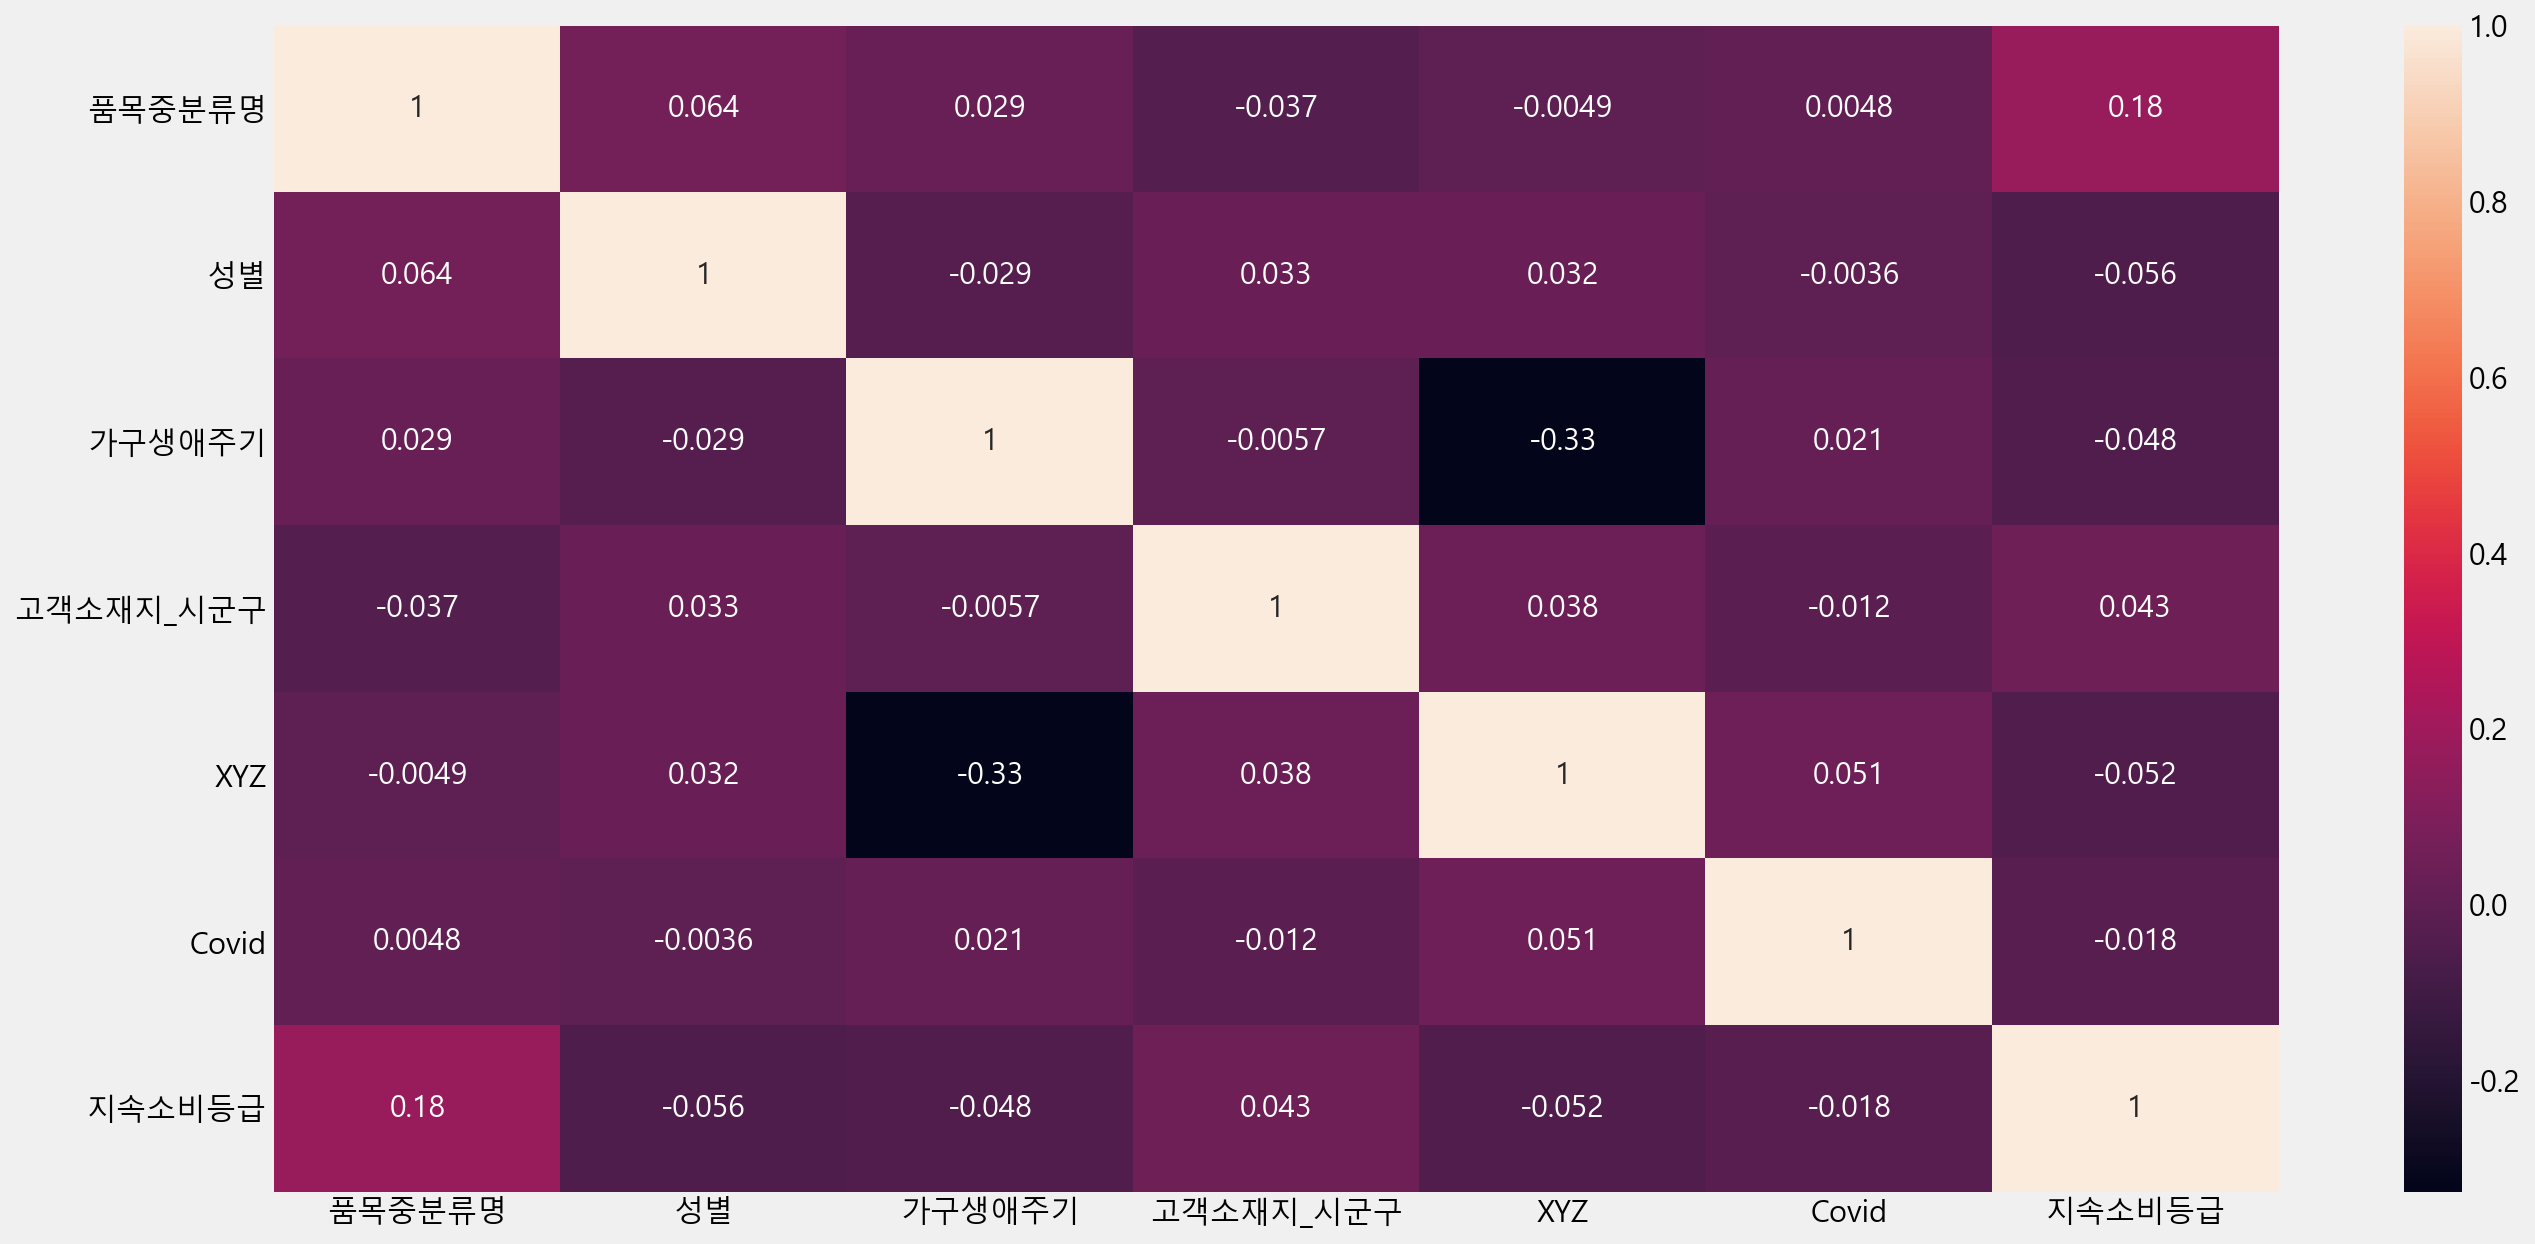

In [89]:
cus_cluster =  df_log
#Correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(cus_cluster.corr(),annot = True)
plt.show()

In [90]:
cus_cluster

,품목중분류명,성별,가구생애주기,고객소재지_시군구,XYZ,Covid,지속소비등급
0,3.636719,0.693359,1.609375,1.946289,0.693359,0.693359,1.386719
1,1.098633,0.693359,1.386719,1.946289,1.098633,0.693359,1.386719
2,3.689453,0.693359,1.386719,1.946289,0.693359,0.693359,0.000000
3,0.693359,0.693359,1.386719,1.946289,0.693359,0.693359,0.000000
4,3.257812,0.693359,1.386719,1.946289,0.693359,0.693359,0.000000
...,...,...,...,...,...,...,...
519292,3.664062,0.693359,0.000000,2.996094,0.693359,0.000000,1.098633
519293,1.098633,0.000000,0.000000,2.996094,0.693359,0.000000,0.000000
519294,3.464844,0.693359,1.386719,2.996094,0.693359,0.000000,1.098633
519295,1.386719,0.000000,1.609375,2.996094,0.693359,0.000000,1.098633


In [91]:
from sklearn.preprocessing import RobustScaler

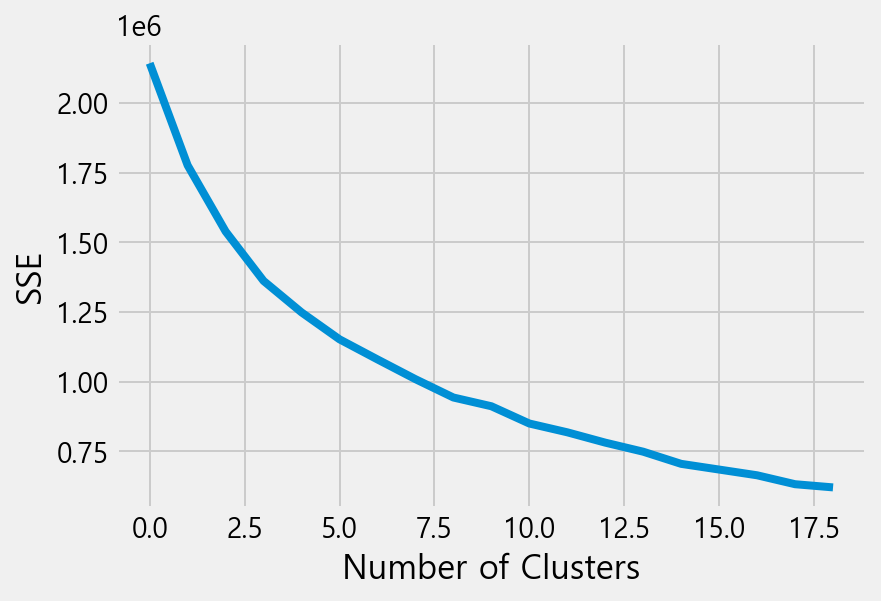

In [41]:
# Elbow Curve
#std=StandardScaler()
#X=std.fit_transform(cus_cluster)   원래 사용 한 스캘러

std=StandardScaler()
X=std.fit_transform(cus_cluster)  

sse = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=123, max_iter=50)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
# plot the SSEs for each k
plt.plot(sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [92]:
std=StandardScaler()
X=std.fit_transform(cus_cluster)  

In [93]:
model = KMeans(n_clusters=4, random_state=123, max_iter=50).fit(X) # 4가 가장 괜찮다
label = model.labels_ + 1 # 0이 아니라 1부터 보고싶어서
pd.value_counts(label) 

cus_cluster

cus_cluster['cluster']=label

In [94]:
cus_cluster['cluster'].value_counts()

4    104563
3     74562
1     67043
2     59954
Name: cluster, dtype: int64

In [95]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

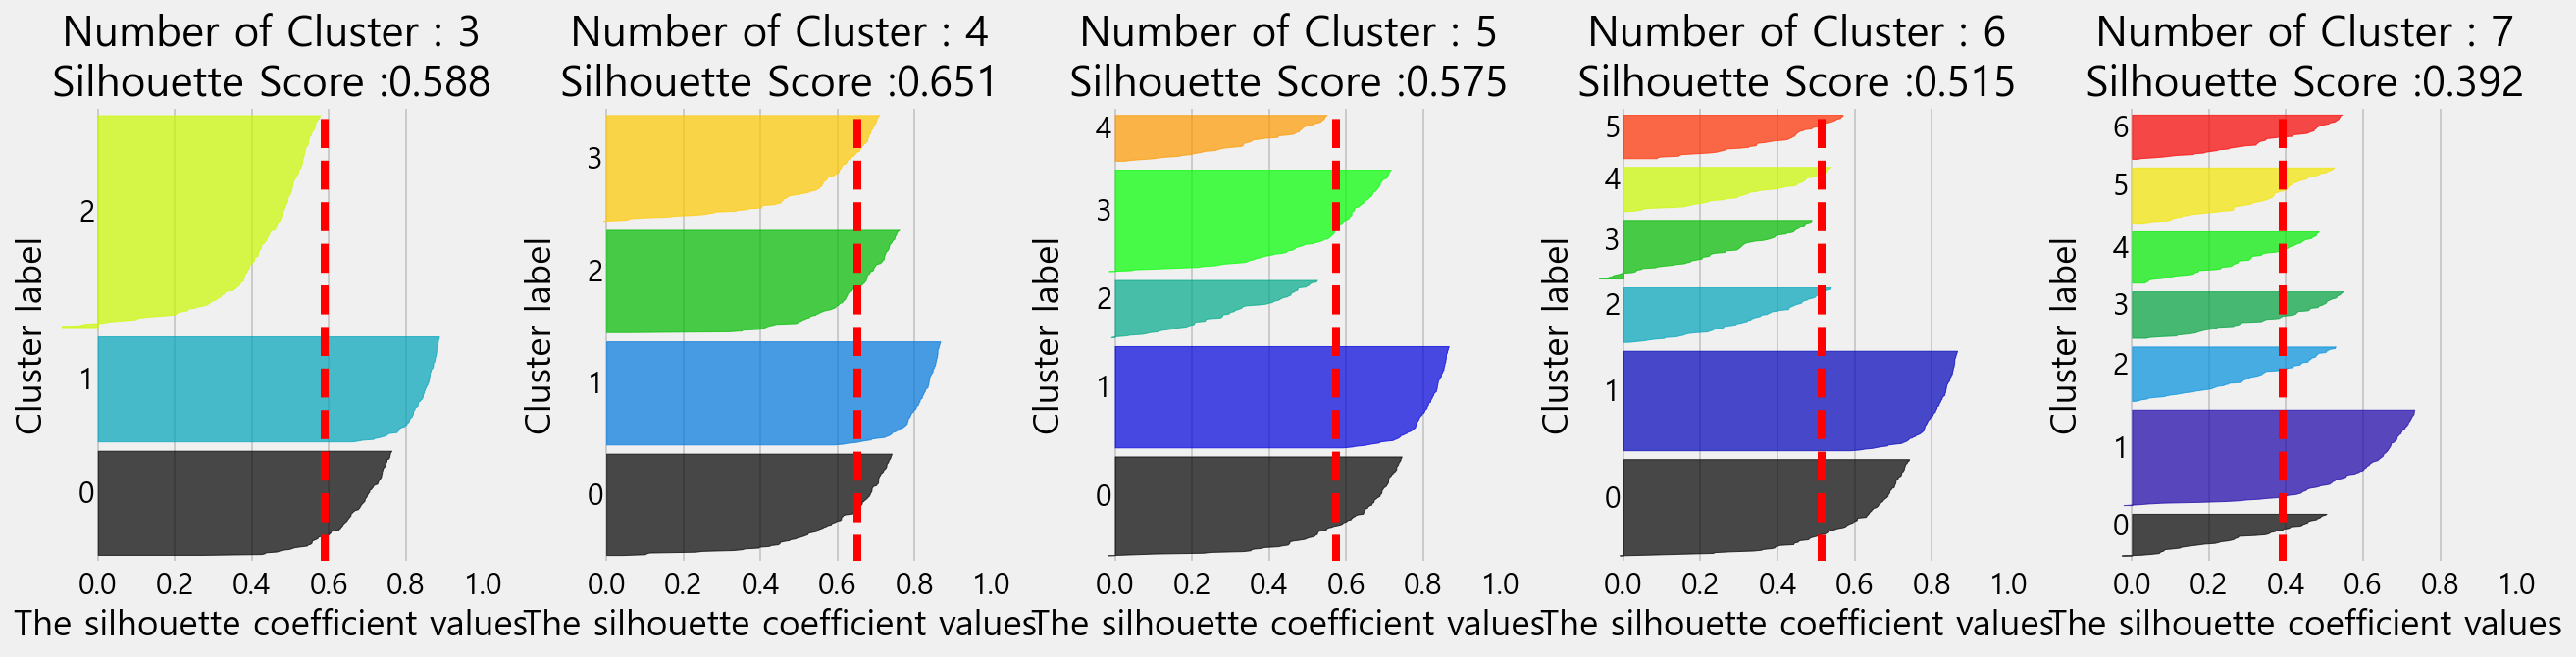

In [96]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3,4,5,6,7], X)

elbow : , 실루엣 : 

In [97]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

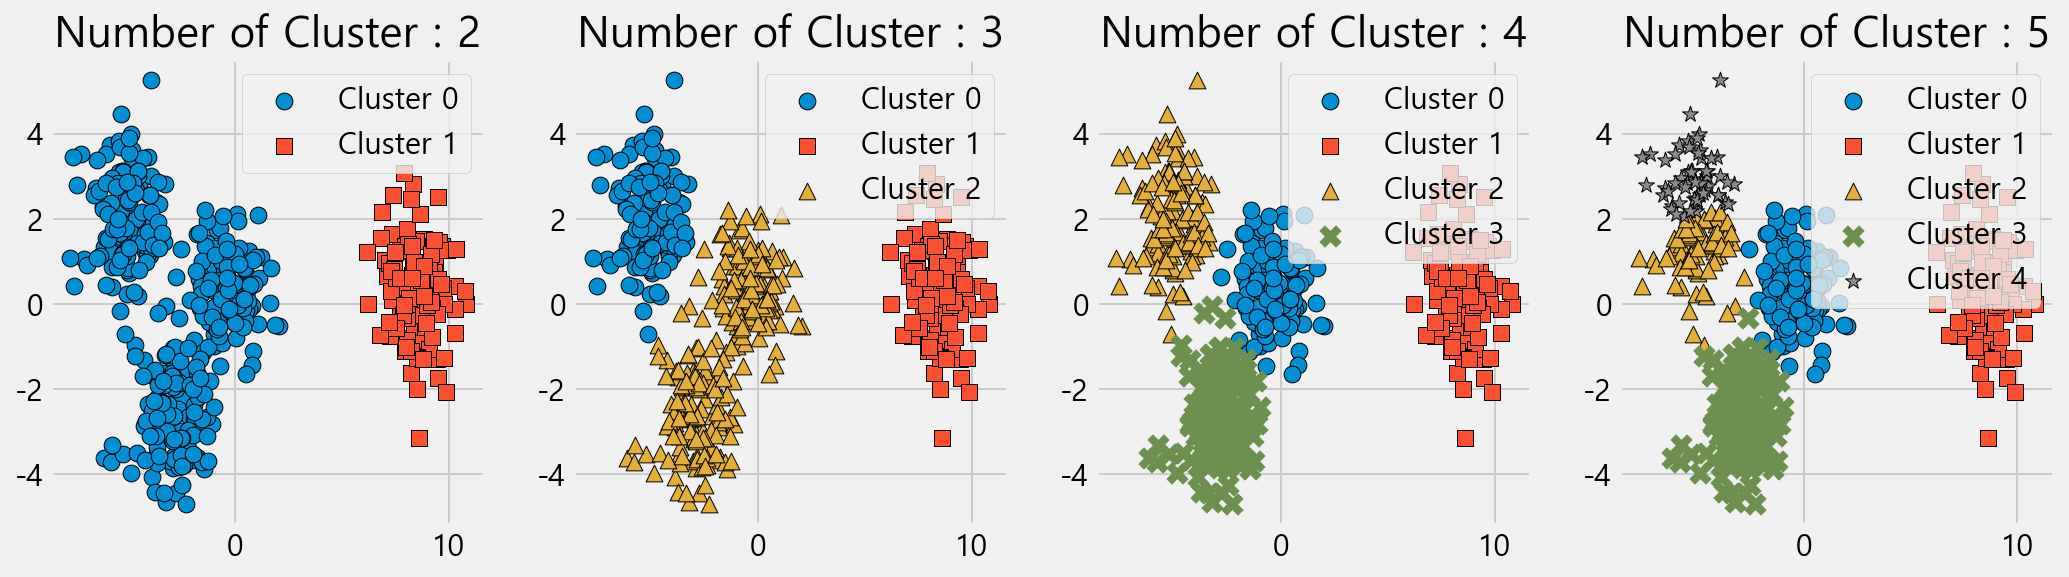

In [98]:
visualize_kmeans_plot_multi([2,3,4,5], X) # 괜찮은것 같다.

In [99]:
cus_cluster['cluster'].value_counts()

4    104563
3     74562
1     67043
2     59954
Name: cluster, dtype: int64

In [100]:
print(len(cus_cluster))
print(len(Seoul))

306122
306122


In [101]:
cus_cluster['cluster'][:5]

0    4
1    4
2    2
3    2
4    2
Name: cluster, dtype: int32

In [102]:
Seoul['cluster'] = cus_cluster['cluster']

In [103]:
Seoul['한번소비'] = Seoul['매출금액'] / Seoul['매출건수']

In [104]:
Seoul.head(5)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,XYZ,Covid,지속소비등급,cluster,한번소비
0,201903,10,의류,1010,여성의류,여성,40,초중고자녀가구,서울특별시,구로구,궁동,782521,13,Y,b_cov,실버,4,60193.923077
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20,신혼영유아가구,서울특별시,구로구,궁동,963789,29,Z,b_cov,실버,4,33234.103448
2,201903,19,출산/육아,1913,육아용품서비스,여성,30,신혼영유아가구,서울특별시,구로구,궁동,924309,46,Y,b_cov,골드,2,20093.673913
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1089360,54,Y,b_cov,골드,2,20173.333333
4,201903,17,생활,1710,생활용품,여성,30,신혼영유아가구,서울특별시,구로구,궁동,1656740,58,Y,b_cov,골드,2,28564.482759


**저장**

In [105]:
Seoul.to_csv('Seoul_Analysis_final.csv', index=False)